# An Analysis of Domestic Flight Delays in the United States
## Spring 2024 Data Science Project
### Created by Harshil Chava, Nicolas Lin, and Ishaan Makhija

<br>

---



### Contribution Summary

**Member 1: Ishaan Makhija**, Contribution: 100%

**Member 2: Nicolas Lin**, Contribution: 100%

**Member 3: Harshil Chava**, Contribution: 100%

<br>

### **We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.**

Ishaan Makhija, 05/07/2024

Nicolas Lin, 05/07/2024

Harshil Chava, 05/07/2024

**Ishaan Makhija:** I mainly focused on parts A, B, C, F, and G. My biggest contributions were finding the dataset to use for the project, processing and cleaning the dataset, the first Chi-squared statistical test in the exploratory data analysis section, and the insights and conclusions section. I also revised and edited all of the other sections that my team members worked on.

**Nicolas Lin:** I mainly focused on parts A, B, C, E, and F. My largest contribution was the ML design and development. Due to the size of the dataset I had to research an algorithm that would be able to train and test on this dataset without running out of ram. I helped find the dataset to use and also did the ANOVA testing.

**Harshil Chava:** I mainly focused on parts A, B, C, F, and H. My biggest contributions were with the 2 sample t test and the visualization associated with it as well as the visualization used for the random forest model that we used. I also ran a few checks through the entire project and made sure that everything seemed accurate and that our results and code matched up with what we were trying to achieve. I finally commented all of our code snippets making it easier to understand later and for other people.


<br>

---



## 1: Introduction

We've all been here before: you're at the airport waiting to go on vacation, visit your family, or just go home and your flight has just been delayed or even worse, cancelled. Whatever your reason for travelling may be, you're probably annoyed at the fact that it'll now take even longer to get to your destination. But have you ever thought about ***why*** your flight might be delayed? Sure, a lot of the time it's usually bad weather that causes issues with planes' arrival or departure times, but there are so many more factors than that which we will explore. Thousands of flights are delayed everyday and this tutorial of the data science lifecycle will allow us to analyze the raw data behind domestic flight delays in the United States. Together we will examine certain trends and answer questions, such as which airports have the most flight delays, what the correlation is between the time of day and delays, and if some commercial airline carriers are more reliably on time than others. It's important to answer these questions not only for frustrated travelers like ourselves but also for airlines, airports, and lawmakers who can improve the efficiency and reliability of air travel in the United States so that we can all get to where we're going both faster and happier. We'll guide you through each step of the data science lifecycle including data curation, exploratory data analysis, primary analysis, visualization, and insights and conclusions. So buckle in and let's get started with preparing our data!


<br>


---




## 2: Data Curation

In this tutorial, we will be using a <a href="https://www.kaggle.com/datasets/giovamata/airlinedelaycauses/data" target="_blank">flight delays dataset from Kaggle</a> that was uploaded by Giovanni Gonzalez and originally sourced from the U.S. Department of Transportation. It contains flight delay information on approximately 1.94 million domestic flights from 2008 in the United States.

Let's start by importing and previewing the data below, using a data science library known as pandas, as well as importing all of the other libraries and tools that we'll need to use later:


In [37]:
# import all libraries to be used in this tutorial
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# read the imported CSV file and store into a dataframe
flights_df = pd.read_csv("DelayedFlights.csv")
print(flights_df)

         Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0                 0  2008      1           3          4   2003.0        1955   
1                 1  2008      1           3          4    754.0         735   
2                 2  2008      1           3          4    628.0         620   
3                 4  2008      1           3          4   1829.0        1755   
4                 5  2008      1           3          4   1940.0        1915   
...             ...   ...    ...         ...        ...      ...         ...   
1936753     7009710  2008     12          13          6   1250.0        1220   
1936754     7009717  2008     12          13          6    657.0         600   
1936755     7009718  2008     12          13          6   1007.0         847   
1936756     7009726  2008     12          13          6   1251.0        1240   
1936757     7009727  2008     12          13          6   1110.0        1103   

         ArrTime  CRSArrTime UniqueCarr

Now, let's look at the details of the data we're working with. Let's use the shape property to see the dimensions of our data:

In [38]:
# .shape is an attribute for data frames that returns the number of rows and colums as a tuple
r, c = flights_df.shape

print("Rows: " + str(r))
print("Columns: " + str(c))

Rows: 1936758
Columns: 30


As you can see above, we have 30 columns of different types of information about each flight delay and nearly 2 million rows of flight delays. That's a lot of data! Now, let's look at what specific data we have by viewing the names and datatypes of the columns in our dataset by using the columns and dtypes properties, respectively:

In [39]:
# .columns is an attribute for data frames that returns the list of column names
print(flights_df.columns)

# .dtypes is an attribute for data frames that returns the variable type for each column
print(flights_df.dtypes)

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')
Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest        

It looks like there's a variety of information ranging from the flight date to the origin and destination airports and even the taxiing times. It also looks like we're primarily dealing with numerical data, so our analysis will be mostly quantitative.

Now let's get into some data cleaning to make sure our dataset is ready for analysis. First, we'll use the count() function to check for any missing data by columns:

In [40]:
# .count() returns the number of non-NaN entries in each of the columns in the data fram
print(flights_df.count())

Unnamed: 0           1936758
Year                 1936758
Month                1936758
DayofMonth           1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
ArrTime              1929648
CRSArrTime           1936758
UniqueCarrier        1936758
FlightNum            1936758
TailNum              1936753
ActualElapsedTime    1928371
CRSElapsedTime       1936560
AirTime              1928371
ArrDelay             1928371
DepDelay             1936758
Origin               1936758
Dest                 1936758
Distance             1936758
TaxiIn               1929648
TaxiOut              1936303
Cancelled            1936758
CancellationCode     1936758
Diverted             1936758
CarrierDelay         1247488
WeatherDelay         1247488
NASDelay             1247488
SecurityDelay        1247488
LateAircraftDelay    1247488
dtype: int64


It seems that we are missing some critical information, such as the air time, arrival delay, taxi times, and some of the other types of delays. For most of the columns, a very small percent of the data is missing so it won't have a noticeable effect on our results. However, around 35% of the data in the last 5 columns is missing for carrier delays, weather delays, security delays, etc. This is most likely due to the delays not being recorded for those categories for those particular flights. So, we can use median imputation in those last 5 columns to repair our dataset:

In [41]:
# fill all NaN values in columns below with the median for that respective column
# this is a process known as median imputation

flights_df['CarrierDelay'] = flights_df['CarrierDelay'].fillna(flights_df['CarrierDelay'].median())
flights_df['WeatherDelay'] = flights_df['WeatherDelay'].fillna(flights_df['WeatherDelay'].median())
flights_df['NASDelay'] = flights_df['NASDelay'].fillna(flights_df['NASDelay'].median())
flights_df['SecurityDelay'] = flights_df['SecurityDelay'].fillna(flights_df['SecurityDelay'].median())
flights_df['LateAircraftDelay'] = flights_df['LateAircraftDelay'].fillna(flights_df['LateAircraftDelay'].median())

print(flights_df.count())

Unnamed: 0           1936758
Year                 1936758
Month                1936758
DayofMonth           1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
ArrTime              1929648
CRSArrTime           1936758
UniqueCarrier        1936758
FlightNum            1936758
TailNum              1936753
ActualElapsedTime    1928371
CRSElapsedTime       1936560
AirTime              1928371
ArrDelay             1928371
DepDelay             1936758
Origin               1936758
Dest                 1936758
Distance             1936758
TaxiIn               1929648
TaxiOut              1936303
Cancelled            1936758
CancellationCode     1936758
Diverted             1936758
CarrierDelay         1936758
WeatherDelay         1936758
NASDelay             1936758
SecurityDelay        1936758
LateAircraftDelay    1936758
dtype: int64


Now that most of the missing data has been replaced, we should check for any duplicate rows by comparing the length of the original dataset to the length after dropping duplicate rows using the drop_duplicates() function:

In [44]:
print("Before dropping duplicates:", len(flights_df))

# .drop_duplicates() checks for any rows that are exactly the same in the data frame
print("After dropping duplicates:", len(flights_df.drop_duplicates()))

Before dropping duplicates: 1936758
After dropping duplicates: 1936758


Luckily, in this case this dataset has no duplicate rows, but don't think that it's not important to check for duplicates when using other datasets!

<br>

It's also important to really understand our dataset by looking at descriptive statistics from each column more closely. For example, let's see how many different airports we have data from. We can use the nunique() function to see how many unique values there are in both the Origin and Dest airport columns. While we're at it let's also check how many airline carriers are represented in the dataset!

In [47]:
# .nunique() in a data frame attribute that returns the number of unique values in a column
print("Unique origin airports:", flights_df['Origin'].nunique())
print("Unique destination airports:", flights_df['Dest'].nunique())

Unique origin airports: 303
Unique destination airports: 304


In [48]:
print("Unique airline carriers:", flights_df['UniqueCarrier'].nunique())

Unique airline carriers: 20


So, as you can see above we have flight data from just over 300 airports and 20 airlines across the country. This means that we get a wide variety of data for delays that won't be skewed for just a couple regions, airports, or airlines.

Let's try looking at some more mathematically descriptive statistics like mean, median, and range. Just as quick examples, we'll calculate the mean weather delay, the median security delay, and the range of the taxiing out time.

In [49]:
# .mean() and .median() are just some of the statistical functions you can use
print("Mean Weather Delay:",  flights_df['WeatherDelay'].mean())
print("Median Security Delay:", flights_df['SecurityDelay'].median())
print("Range of Taxiing Out Times:", flights_df['TaxiOut'].max() - flights_df['TaxiOut'].min())

Mean Weather Delay: 2.3855122839301552
Median Security Delay: 0.0
Range of Taxiing Out Times: 422.0


These quantitative statistics tell us a few things about flights in 2008, like that most of them didn't have any security delay and that the weather delay was usually very short based on the low mean of 2 minutes. It's important to examine these descriptive statistics to get a better understanding of the data you're dealing with before jumping into analysis.

But now that our data has been cleaned and examined, it is ready to be analyzed and we are ready to move on to the next step of the data science lifecycle: exploratory data analysis. But before that, if you do want to learn more about preprocessing and cleaning up your own dataset, GeeksforGeeks has a lot more information in a great tutorial that uses data from the passengers on the Titanic and you can find it at [this link](https://www.geeksforgeeks.org/data-cleansing-introduction/).

<br>

---



## 3: Exploratory Data Analysis

First, I'd like to do a statistical test to see if there's a correlation between the origin airport that a flight is supposed to leave from and it's cancellation probability. We'll use a Chi-Squared test since we're trying to find a relationship between 2 categorical variables in our dataset. The following will be the null and alternate hypotheses:

H0: The airport a flight is leaving from does not have an effect on the likelyhood of it being cancelled

HA: The airport a flight is leaving from does have an effect on the likelyhood of it being cancelled

Now that we have our statistical test all set up, let's use the crosstab function to create a contingency table for our 2 categorical variables. A contingency table is a type of table that shows the frequency between different variables. In this case, one row of the contingency table will be a single airport with the number of flights that were cancelled from that airport and the number of flights that were not cancelled from that airport.

If you're not familiar with statistical or hypothesis testing, [this](https://www.simplilearn.com/tutorials/statistics-tutorial/hypothesis-testing-in-statistics) is a quick tutorial for you to become more familiar with the concept. Statistical tests in data science are an important and necessary way to explore and find patterns in the data.

In [50]:
# setting up chi squared table using pd.crosstab with origin and cancelled as columns
chi_ct = pd.crosstab(flights_df['Origin'], flights_df['Cancelled'])
print(chi_ct)

Cancelled      0  1
Origin             
ABE          946  3
ABI          392  0
ABQ        10674  0
ABY          292  0
ACK          196  0
...          ... ..
WYS           10  0
XNA         3573  4
YAK          202  0
YKM           55  0
YUM          687  0

[303 rows x 2 columns]


Before performing any statistic test, let's visualize the relationship we're trying to find. We can make plots and graphs using the matplotlib library. In this case a bar graph would be most fitting:

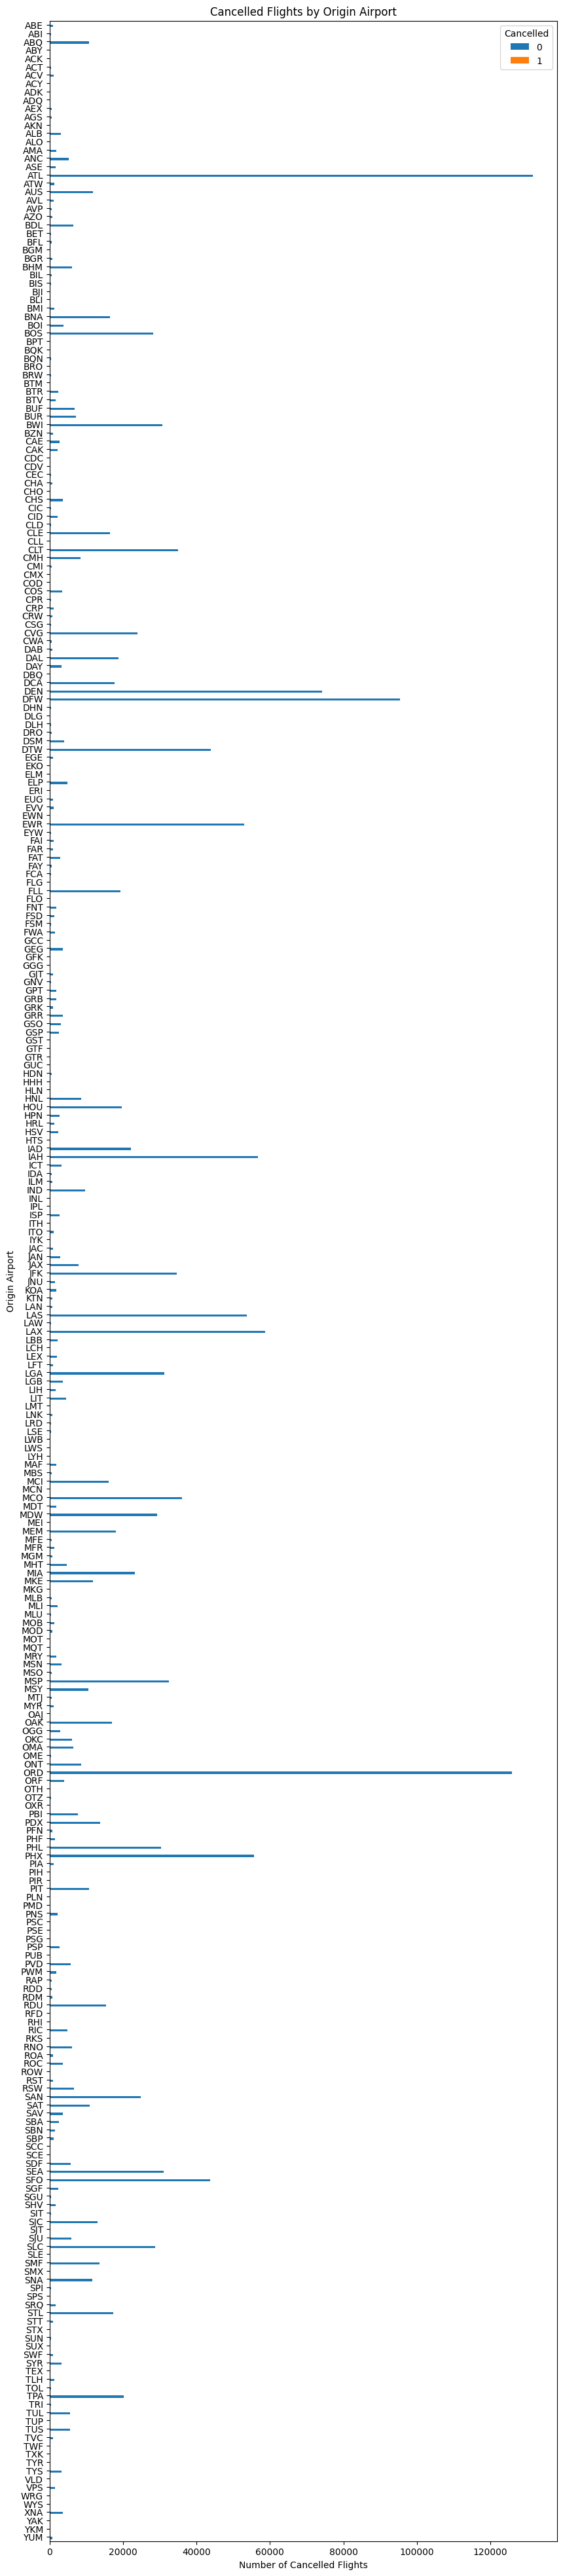

In [51]:
# sort all of the airports in alphabetical order
cancelled_flights_sorted = chi_ct.sort_index(ascending=False)

# plot a bar graph
cancelled_flights_sorted.plot(kind='barh', figsize=(10, 50))
plt.title('Cancelled Flights by Origin Airport')
plt.xlabel('Number of Cancelled Flights')
plt.ylabel('Origin Airport')
plt.show()

<br>


---


Now we'll use the scipy library to perform my Chi-Square statistical test on the contingency table, using a significance level of 0.01, to obtain a p-value test statistic:

In [52]:
from scipy.stats import chi2_contingency

chi_test = chi2_contingency(chi_ct)
print(chi_test.pvalue)

1.009707445576314e-19


Since our p-value is much smaller than the significance level of 0.01 and is within the critical region, we will reject the null hypothesis with 99% confidence. Instead, we will accept the alternate hypothesis and conclude that the airport a flight is leaving from does have an effect on the likelyhood of it being cancelled.

By analyzing our plot above, we can also see that the top 3 airports in the United States with the greatest number of flight cancellations in 2008 were ATL, ORD, and DFW. This makes sense seeing as all 3 of these airports are in highly populous cities that are major hubs for international travel: Atlanta, Chicago, and Dallas.

<br>



---



Now, I will be conducting an ANOVA test to see if there is any correlation between the time the flight is supposed to take off (will be separated into 0000-0559, 0600-1159, 1200-1759, 1800-2359), and it's probability of departing late. The following are the null and alternate hypotheses:

H0: The time the flight leaves has no affect on the probability of it being cancelled.

HA: The time the flight leaves has an affect on the probability of it being cancelled.

I will be using a significance level of 0.01.

Now that our stats test is set up we will use f_oneway to conduct an ANOVA test. Firstly I'm making a new column which separtes the time zones based on the CRSDepTime. Then I am creating a new column which takes the difference between the listed departure time (CRSDepTime) and the actual departure time (DepTime), which we get from DepDelay. Then running the ANOVA test based on the 4 various time intervals.

In [53]:
from scipy.stats import f_oneway
import math

# cut the departure time into zones mentioned above
flights_df['TimeSlot'] = pd.cut(flights_df['CRSDepTime'], bins = [0, 559, 1159, 1759, 2359], labels=['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4'])

Now that we have completed the ANOVA test we will now visualize this data using a box plot.

<Figure size 5000x4000 with 0 Axes>

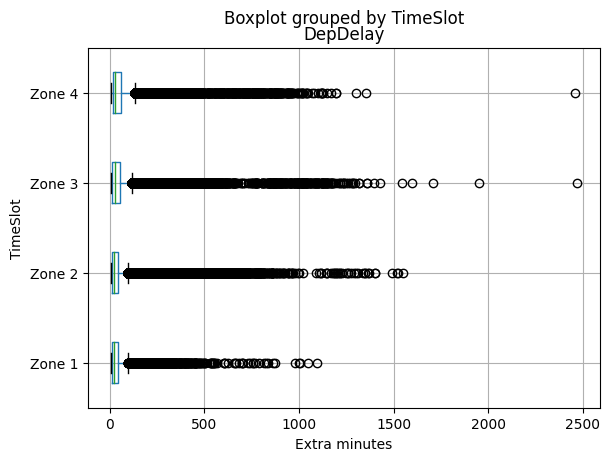

In [54]:
# plot data horizontally as a boxplot
plt.figure(figsize=(50, 40))
flights_df.boxplot(column='DepDelay', by='TimeSlot', vert=False)
plt.xlabel('Extra minutes')
plt.show()

So, as you can see we have a boxplot and we can see that for the most part, most of the time zones have pretty low averages but we can see that after Zone 1 the other zones have a lot more outliers that are extended past the extra 1000 minutes of waiting mark.

<Figure size 5000x4000 with 0 Axes>

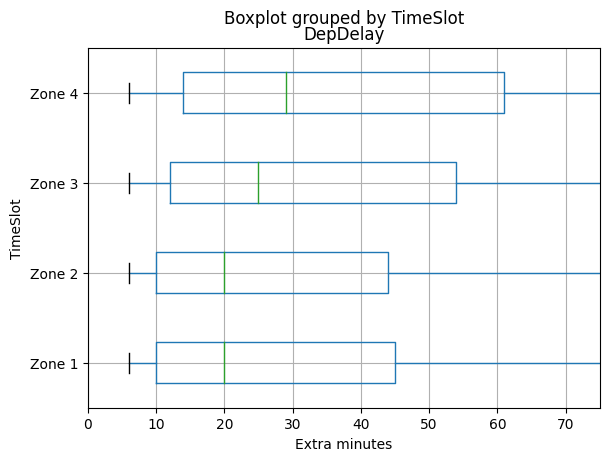

In [56]:
# plot again but limit the x-axis so that we can see our boxplot better
plt.figure(figsize=(50, 40))
flights_df.boxplot(column='DepDelay', by='TimeSlot', vert=False)
plt.xlabel('Extra minutes')
plt.xlim(0,75)
plt.show()

Here is a more zoomed up version of the data. We can see that Zone 1 and 2 have similar average number of extra minutes of wait times. We can also note see that for around 68% of the population they have a wait time from around ~10-60 minutes, note that it varies from time zone. Something else to note is that there are zero flights that left on time, because there are no outliers outside of the second standard deviation.

Now I will run the ANOVA test to see if there is any correlation.

In [57]:
import numpy as np

# calculate z-scores of the DepDelay columns
flights_df['z_scores'] = np.abs(flights_df['DepDelay'] - flights_df['DepDelay'].mean()) / flights_df['DepDelay'].std()

# filter based on the z-scores that are less than 0.1
filtered_flights_df = flights_df[flights_df['z_scores'] < 0.1]

# do anova test using the 4 zones from the filtered df
anova = f_oneway(filtered_flights_df[filtered_flights_df['TimeSlot'] == 'Zone 1']['DepDelay'],
                 filtered_flights_df[filtered_flights_df['TimeSlot'] == 'Zone 2']['DepDelay'],
                 filtered_flights_df[filtered_flights_df['TimeSlot'] == 'Zone 3']['DepDelay'],
                 filtered_flights_df[filtered_flights_df['TimeSlot'] == 'Zone 4']['DepDelay'])

print(anova.pvalue)

3.2374782123010906e-05


Now, as you can see I calculated the z-scores and filtered a new dataframe out of the old one. The reason being is because there are so many entries that if I were to do the ANOVA test any more than 0.1 I would just receive a p-value of 0.0. So even from such a small dataset of ~150,000 entries we still can actively reject the null hypothesis as the pvalue is smaller than our significance level of 0.01.

So, in the end we can conclude that there is a correlation between the time when the flight leaves and the probability of it departing late.

<br>



---



We can also conduct a 2 sample t-test on our dataset to find if the mean arrival delay for flights operated by two different carriers is significantly different from each other. We use a 2 sample t-test for this since there are 2 samples that we are comparing and we might not know the population standard deviation. First, let's find all of the carriers that we can select from.

In [58]:
flights_df['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

Let's select WN (Southwest) and UA (United Airlines) and their arrival delays and store them into a new variable.

In [59]:
WN = flights_df[flights_df['UniqueCarrier'] == 'WN']['ArrDelay']
UA = flights_df[flights_df['UniqueCarrier'] == 'UA']['ArrDelay']

Now that we have identified our 2 samples, we can create our null and alternate hypotheses.


H0: The mean arrival delays for Southwest and United Airlines and their flights are equal.

HA: The mean arrival delays for Southwest and United Airlines and their flights are not equal.


We chose our null hypothesis to show that there is no delay between the two airlines since we want our null hypothesis to represent if there was no difference, and our alternate hypothesis to be the opposite.

First let's check if all of our data is clean.

In [60]:
print("WN NAN %: " + str(WN.isna().sum()/len(WN) * 100))
print("UA NAN %: " + str(UA.isna().sum()/len(WN) * 100))

WN NAN %: 0.37102557719503604
UA NAN %: 0.13824079321613764


We can see above that there are NaN values in our data, but since it represents such a small part of the data (less than 1% for both), we can just drop the rows with NaNs and then plot our data

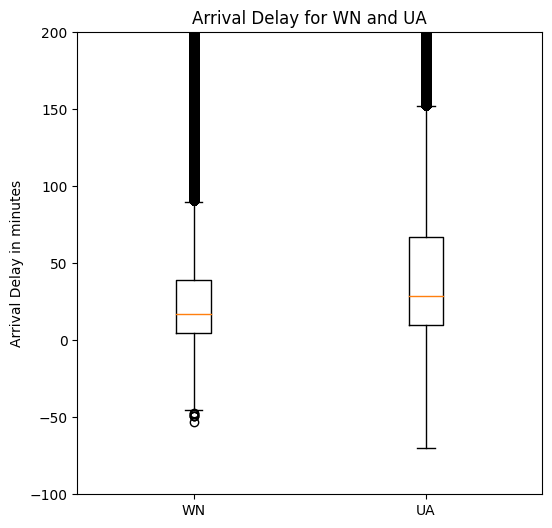

In [61]:
WN = WN.dropna()
UA = UA.dropna()
plt.figure(figsize=(6, 6))
plt.boxplot([WN, UA], labels=['WN', 'UA'])
plt.title('Arrival Delay for WN and UA')
plt.ylabel('Arrival Delay in minutes')
plt.ylim(-100,200)
plt.show()

Aside from the egregious number of delayed arrivals represented as outliers, we can see how the median is higher for UA than WN. The range is also greater for UA since its boxplot extends more into the negative arrival delay and into the positive arrival delay than WN. We can say that the variability is higher for UA than WN because of this and it might be unreliable for some people to fly on.

Now, let's do our actual t-test. We will use a significance level of 0.01 and the ttest_ind tool from scipy.stats to do our 2 sample t-test

In [62]:
from scipy.stats import ttest_ind
t_stat, p = ttest_ind(UA,WN)
print("t_stat: " + str(t_stat))
print("p_value: " + str(p))

t_stat: 117.99511757032019
p_value: 0.0


The t-statistic is used to to describe the magnitude between the means of the two groups. The high positive number means that the first group mean was greater than the second, or United Airlines had a higher average arrival delay than Southwest Airlines.

Our p-value is 0, which might be confusing but it is most likely just because the ttest_ind function just rounds it early. Therefore, we can take this as a very low p-value. Because our very small p-value is less than our significance level of 0.01, we can reject the null hypothesis, meaning that the mean arrival delays for Southwest and United Airlines and their flights are not equal.

<br>



---



### Conclusion

As you can see, we've found several statistical relationships in our dataset using the important attributes of cancellations and departure delays data. Ultimately, we found that there are strong correlations between flight disruptions and various different airports, airlines, and flight timings in the United States. Now we know which columns in our dataset contain critical information that we can use in the next steps of the data science life cycle: analysis, visualization, and insights and conclusions.

If you'd like to see more examples of applying statistical tests to your data, check out [this excellent resource](https://www.stratascratch.com/blog/basic-types-of-statistical-tests-in-data-science/) that also includes more examples with code snippets.

<br>



---



## 4. Primary Analysis

Now that we have finished our exploratory data analysis we plan to do our primary analysis which requires us to partition the data, train and apply a machine learning model, and then finally evaluate the performance of the model. A reminder as to what our question is, is finding the main reason why flights are often delayed. We selected various reasons as to why a plane's departure may be delayed, which we denote in X. The overall delay is noted in y. We chose a test size of 0.3 as this is a fairly large enough dataset that we shouldn't get data that is too obscured or a model that is too simple from training on 70% of the data. We also have to use a scaling mechanism to make sure that we standardize the data and make sure that it's consistent in order to have accurate results. For that we'll use the StandardScaler tool by importing it from sklearn.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# choose our dependent and independent variables
X = flights_df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
y = flights_df['DepDelay']

# set seed for reproducibility
seed = 42

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# fit the x train and test data
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

Now that we have finished partitioning the data, we will use Random Forest to be our ML classification model for this dataset.

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=seed)

Now we will evaluate the model with the test set in which the model wasn't trained on.

In [83]:
from sklearn.metrics import mean_squared_error
rf.fit(X_train_scaled, y_train)

print("The accuracy of the model: ", rf.score(X_test_scaled, y_test))
print("The Mean Squared Error: ", mean_squared_error(y_test, rf.predict(X_test_scaled)))

The accuracy of the model:  0.9442132763510401
The Mean Squared Error:  159.74102017764892


The reason why we chose to do a regression ML technique is because this is a dataset with continuous types of data and using a classification technique wouldn't correctly identify the data. Due to the dataset being so large with nearly 2 million records we also had to choose an ML technique that would be able to handle it well. Not only that but it also tends to not overfit from training as much as other models do, which is something that we aim for when setting hyperparameters. Ideally, you want to have a model that is neither underfitting nor overfitting your dataset. Based on an accuracy of around 0.94, it looks like the model we trained does an excellent job of predicting the actual departure delay.

<br>

Now let's try clustering our data based on K-means clustering to organize our unlabelled data into labelled groupings. Let's focus on the relationship between the weather delay and the time of day for the departure. We'll use the Elbow method to find the prime number of clusters based on the sum of squares error (SSE) by varying our value of k from 1 to 10 and calculate the error for each.

If you want more details on how exactly K-means clustering works and the Elbow method, check out [this page](https://www.geeksforgeeks.org/k-means-clustering-introduction) from GeeksforGeeks.


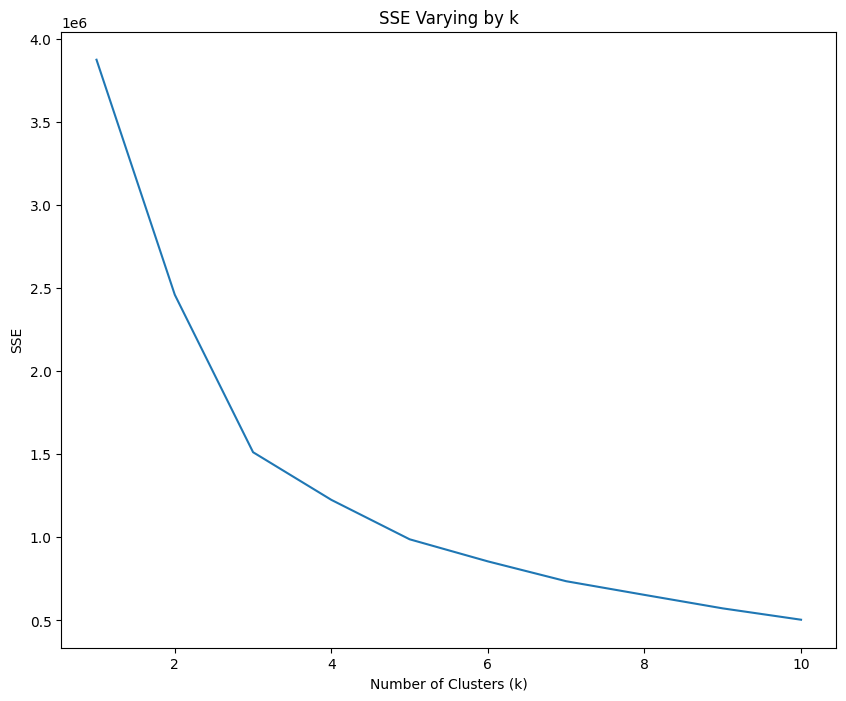

In [79]:
from sklearn.cluster import KMeans

# choosing columns of interest
X_2 = flights_df[['DepDelay', 'DepTime']]

# fitting them
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_2)

# looping through cluster numbers to find which to use using elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_2)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse)
plt.title('SSE Varying by k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

It looks like we should use k = 4 clusters for our K-means clustering based on the plot of the Elbow curve above.

<br>



---



## 5. Visualization

Let's plot the relationship between predicted and actual delay from our Random Forest ML model using a scatter plot below:

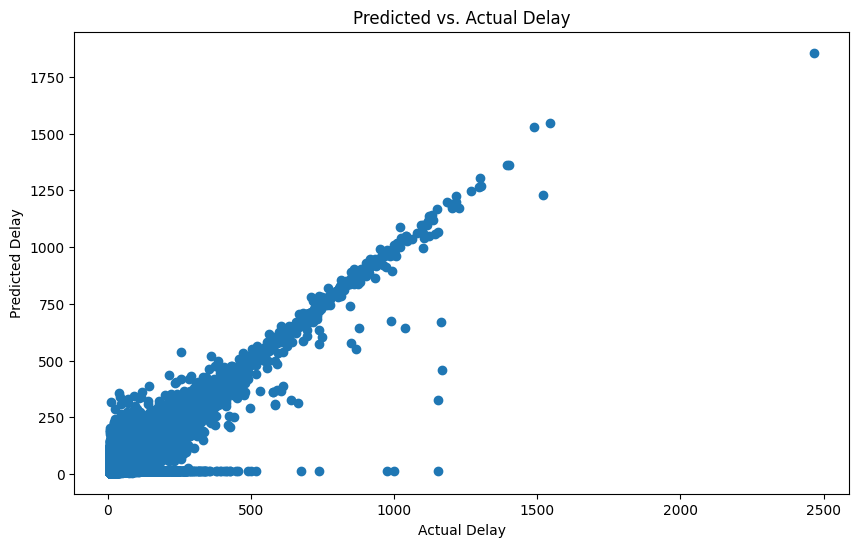

In [84]:
import matplotlib.pyplot as plt

# predict data using our random forest model
predictions = rf.predict(X_test_scaled)

# plot predictions and action delay together as scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=predictions)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Predicted vs. Actual Delay")
plt.show()

From the scatter plot, it looks like our model struggled a little bit to predict smaller delay times but as they increased, the model became extremely accurate.

<br>

Now, going back to our K-mean clustering and using k = 4 clusters, we'll plot the distinct clusters in a scatter plot below:

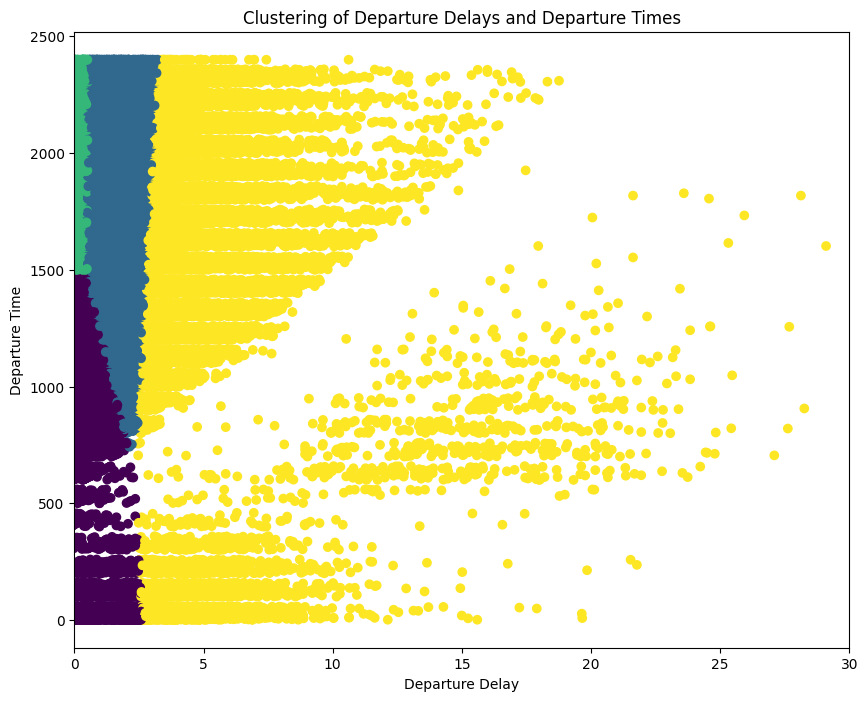

In [77]:
k = 4

# run kmeans given k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled_2)

# store the cluster labels for each datapoint categorized by the regression
labels = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_scaled_2[:, 0], X_2.iloc[:, 1], c=labels)
plt.xlabel('Departure Delay')
plt.ylabel('Departure Time')
plt.title('Clustering of Departure Delays and Departure Times')

# limit the x-axis from 0 to 30 to visualize the spread of the datapoints better by hiding outliers
plt.xlim(0, 30)
plt.show()

<br>



---


## 6. Insights and Conclusions

This is the final part of our data science lifecycle where we use all of the patterns, visualizations, and analysis to make conclusions. In this case, we hope that our conclusions can be used to make air travel in the United States more convenient and less stressful for travelers.

In our exploratory data analysis, we pointed out some of the airports with the most cancellations so that all of you who travel often can change your plans to avoid them. We also compared the delays for two very popular domestic airlines that you can take into account when purchasing a ticket for your next flight. There are so many more patterns and trends in this dataset that still have yet to be explored and we hope you're inspired to build upon our tutorial and discover even more!

In our primary analysis, the accuracy of our Random Forest machine learning model served as an example for airports and airlines to implement these tools in predicting their departure and arrival delay times. They can use historic and current data to predict future delays and keep their customers updated with the most accurate and reliable information about their flights.

Our K-means clustering analysis showed a relationship between departure times and departure delays within each cluster. While some clusters showed a negative correlation, indicating that flights with more departure delays tend to depart later in the evening or night, others showed a positive correlation, suggesting that flights with more departure delays might be scheduled in the earlier hours of the day. This demonstrates the importance of considering departure times for any travelers out there who are booking flights.

These are just some of the patterns we noticed that can give the aviation industry the incentive to make changes that can drastically improve the experience of flying for hundreds of millions of Americans. No flight delays or cancellations would only exist in a perfect world but maybe we can get a little closer with the help of data science!

<br>

We hope you've learned a lot from following along with us through the full data science lifecycle from data cleaning all the way to making insights! Hopefully now you can choose your own dataset, go through the same steps, and create your own analysis and conclusions!